#    <font face="STCAIYUN" color=black size=7> <header><div style="text-align:center;"> Final Project of Data Science</div></font></header>

# <font color=blue size=6> Ⅰ. Background </font> 


# <font color=blue size=6>  Ⅱ. Research Procedure </font> 

# <font color=blue size=6>  Ⅲ. Import Libraries </font>

In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import time
import sys

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from wordcloud import WordCloud
from sklearn.pipeline import make_pipeline

#  <font color=blue size=6>  Ⅳ. Term & Character Analysis </font>

 <font color=black size=4>***Step 1: load book file&clean data***</font>

In [149]:
#excluded all the unnecessary and meaning 
excludes = ['the','and','to','of','i','a','in','it','that','is',
            'you','my','with','not','his','this','but','for',
            'me','s','he','be','as','so','him','your','was','had','have','I','we','from','here','there','said','t','on',
           'word','d','one','up','an','her','she','when','they','what','about','were','out','our','if','by','no','didn','am','"i','at',
            'just','all','or','and','would','then','them','who','into','than','all','down','over','way','day']
includes = ['major','snowball','nappoleon','squealer','boxer','clover','benjamin','moses','mollie','eminem','old major',
             'mr jones','mr pilkington','mr frederick','mr whymper','jones','pilkington','frederick','whymper','minimus','mr','mrs']
def getText():    
    txt=open('data/Animal Farm.txt','r').read()    
    txt=txt.lower()    
    for ch in "~@#$%^&*()_-+=<>?/,.:;{}[]|\'""":    
        txt=txt.replace(ch,' ')       
    return txt    

KiteRunner=getText()    
words=KiteRunner.split() 
#words

In [150]:
counts={}    
sumcount = 0  
for word in words:    
    counts[word]=counts.get(word,0)+1  
    sumcount = sumcount + 1 

counts_ex = counts.copy()    
for key in counts.keys():
    if key in excludes:
        counts_ex.pop(key)
items=list(counts_ex.items())    
items.sort(key=lambda x:x[1],reverse=True)    

for i in range(30):    
    word,count=items[i]    
    print('{0:<10}{1:>5}'.format(word,count))    

 #write all the output result into a txt file
outfile = open('data/Word Frequency Summary1.txt', "w")    
lines = []      
lines.append('Word Type：'+str(len(items))+'\n')    
lines.append('Word Total Number：'+str(sumcount)+'\n')    
lines.append('Word Frequency(descending order):\n')    
lines.append('word\tcounts\n')    

s= ''    
for i in range(len(items)):    
    s = '\t'.join([str(items[i][0]), str(items[i][1])])    
    s += '\n'      
    lines.append(s)    
print('\nOutput printing finished！\n')    
outfile.writelines(lines)    
outfile.close()


animals     248
their       197
been        162
farm        160
napoleon    159
which       136
snowball    126
"           114
animal      103
pigs         93
boxer        86
now          83
jones        81
could        76
time         75
work         72
more         71
two          70
windmill     70
squealer     67
other        60
after        60
every        59
did          57
even         56
some         55
back         52
round        52
never        51
came         50

Output printing finished！



Then analyze all the characters' name :

In [161]:
counts={}    
sumcount = 0  
for word in words:    
    counts[word]=counts.get(word,0)+1  
    sumcount = sumcount + 1 

counts_ex = counts.copy()    
for key in counts.keys():
    if key not in includes:
        counts_ex.pop(key)
items=list(counts_ex.items())    
items.sort(key=lambda x:x[1],reverse=True)    

for i in range(15):    
    word,count=items[i]    
    print('{0:<10}{1:>1}'.format(word,count))    

 #write all the output result into a txt file
outfile = open('data/Word Frequency Summary Of Character1.txt', "w")    
lines = []      
# lines.append('Character'+'\t'+'Frequency'+'\n')    
# lines.append('Word Total Number：'+str(sumcount)+'\n')    
# lines.append('Word Frequency(descending order):\n')    
# lines.append('word\tcounts\n')    

s= ''    
for i in range(len(items)):    
    s = '\t'.join([str(items[i][0]), str(items[i][1])])    
    s += '\n'      
    lines.append(s)    
print('\nOutput printing finished！\n')    
outfile.writelines(lines)    
outfile.close()

snowball  126
boxer     86
jones     81
squealer  67
clover    47
mr        43
frederick 33
benjamin  32
pilkington28
major     19
mollie    18
whymper   16
moses     10
mrs       5
minimus   3

Output printing finished！



<font color=black size=4>***Step 2: Pie-chart representation of Character***</font>

In [203]:
character_frequency = pd.read_csv('data/Word Frequency Summary Of Character1.txt',sep = '\t')
character_frequency

,snowball,126
0,boxer,86
1,jones,81
2,squealer,67
3,clover,47
4,mr,43
5,frederick,33
6,benjamin,32
7,pilkington,28
8,major,19
9,mollie,18


In [204]:
character_frequency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
snowball    14 non-null object
126         14 non-null int64
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [205]:
##  checking the ratings column which will be our target for sentiment analysis

# print("Unique Ratings: ",character_frequency.overall.unique())

rating = character_frequency.sort_index(ascending = False)
rating = character_frequency.reset_index()
rating.columns = ["ID","Rating", "Frequency"]
rating["Percentage"] = rating.Frequency / rating.Frequency.sum() * 100
rating

,ID,Rating,Frequency,Percentage
0,0,boxer,86,17.622951
1,1,jones,81,16.598361
2,2,squealer,67,13.729508
3,3,clover,47,9.631148
4,4,mr,43,8.811475
5,5,frederick,33,6.762295
6,6,benjamin,32,6.557377
7,7,pilkington,28,5.737705
8,8,major,19,3.893443
9,9,mollie,18,3.688525


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


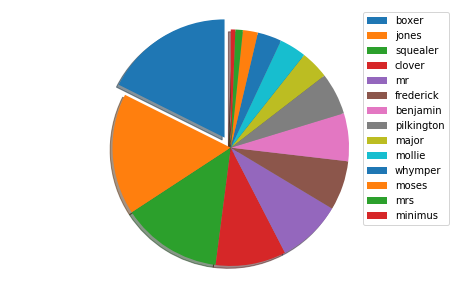

In [206]:
## Pie-chart representation of the different ratings

plt.figure(figsize=(8,5))
explode=[0.1,0,0,0,0,0,0,0,0,0,0,0,0,0]
x, y = plt.pie(rating["Percentage"], explode=explode,labels=rating.Rating,shadow=True, startangle=90,textprops={"color":"w", "fontsize":10})

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(x, labels = rating.Rating, loc="best")

In [213]:
rating.to_csv('data/Word Frequency Summary Of chart.csv') 

In [214]:
data1 = rating['Percentage']
rating['Sentiment'] = data1



rating.to_csv(r"data/Word Frequency Summary Of chart(addSentiment).csv",mode = 'a',index =False)
#rating.to_csv('data/Word Frequency Summary Of chart.csv')

 <font color=black size=4>***Step 3: Generate wordcloud***</font>

Analyze all terms in the book :

In [215]:
ifn = r"data/Animal Farm.txt"
ofn = r"data/Word Frequency Summary2.txt"
 
infile = open(ifn,'r')
outfile = open(ofn,'w')
 
for word in words:
    if word not in excludes:
        outfile.write(word) 
        outfile.write(" ")
infile.close
outfile.close


<function TextIOWrapper.close()>

In [216]:
out = pd.read_csv('data/Word Frequency Summary2.txt')
out

""


Analyze the character in the book:

In [217]:
ifn2 = r"data/Animal Farm.txt"
ofn2 = r"data/Word Frequency Summary Of Character2.txt"
 
infile2 = open(ifn2,'r')
outfile2 = open(ofn2,'w')
 
for word in words:
    if word in includes:
        outfile2.write("  \n"+word+"  \n") 
        
infile2.close
outfile2.close

<function TextIOWrapper.close()>

In [220]:
out = pd.read_csv('data/Word Frequency Summary Of Character2.txt')
out

,mr
0,jones
1,mrs
2,jones
3,major
4,mr
5,jones
6,major
7,major
8,boxer
9,clover


In [221]:
WordFrequency = "data/Word Frequency Summary2.txt"
with open(WordFrequency) as f:
    mytext = f.read()

(-0.5, 399.5, 199.5, -0.5)

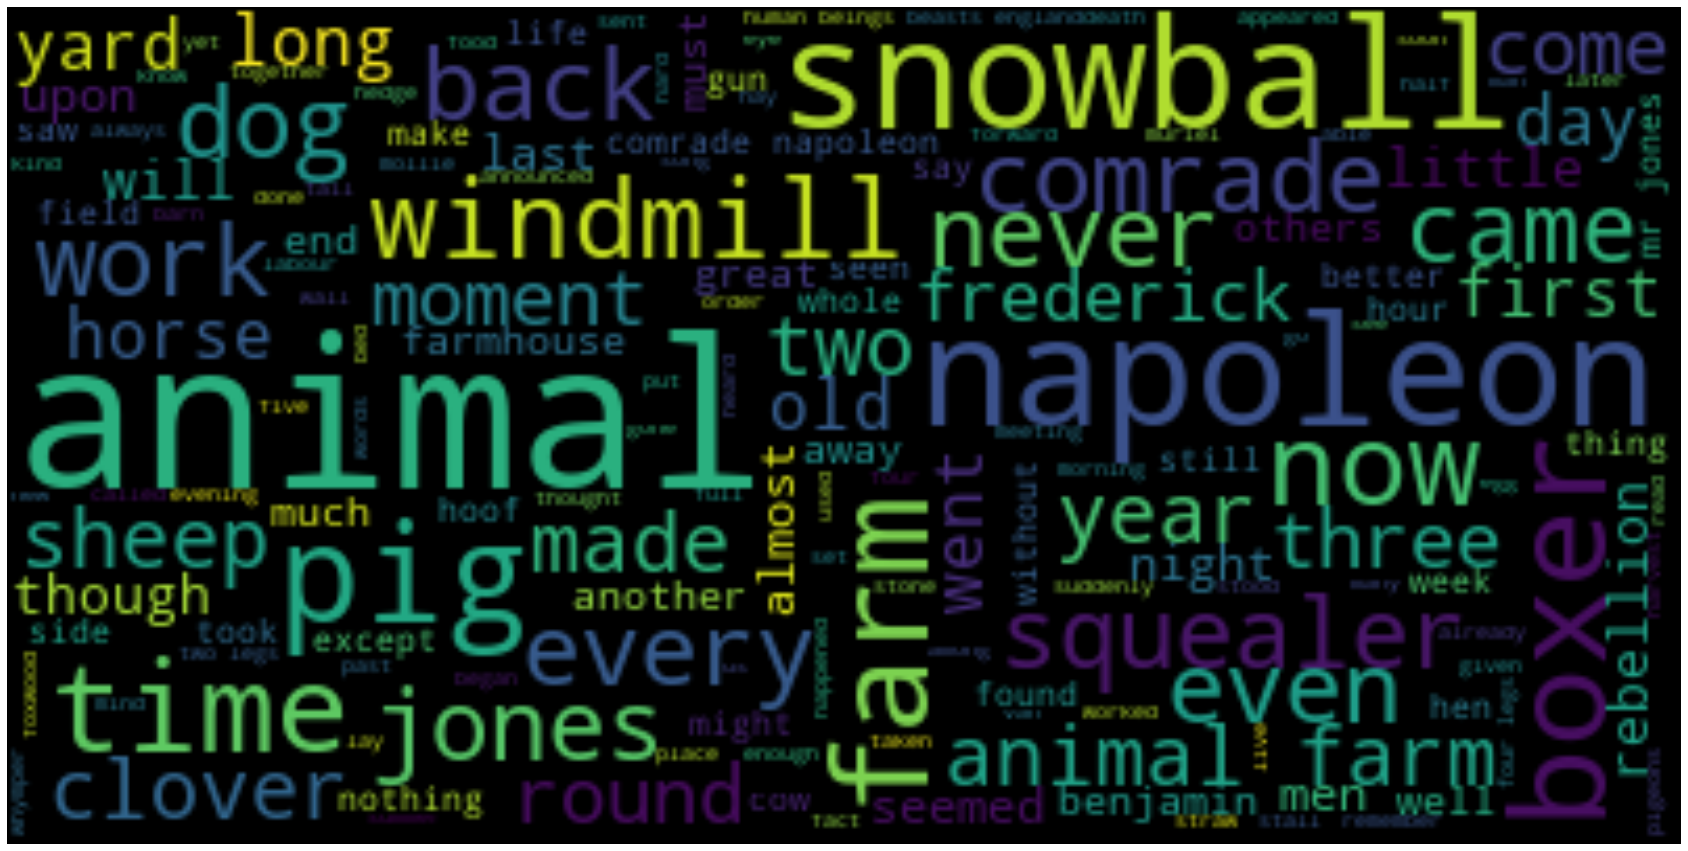

In [222]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="black", max_font_size=50).generate(mytext)
plt.figure(figsize=(30, 30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

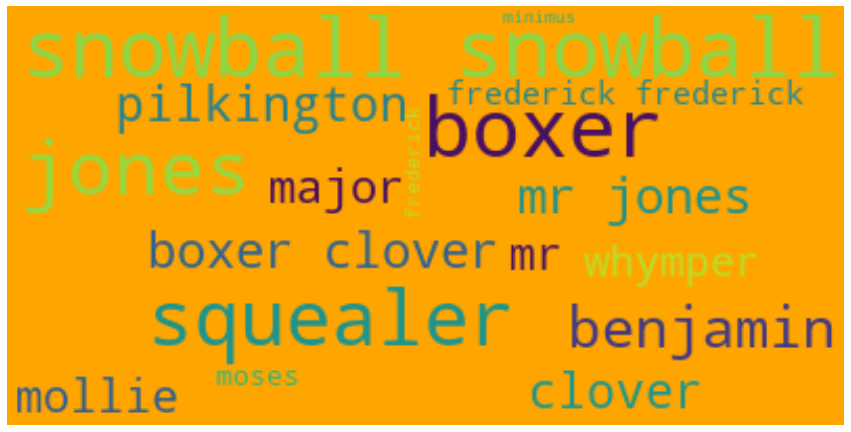

In [223]:
WordFrequencyCharacter = "data/Word Frequency Summary Of Character2.txt"
with open(WordFrequencyCharacter) as f:
    mytext1 = f.read()
    
wordcloud = WordCloud(background_color="orange", max_font_size=70).generate(mytext1)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

#  <font color=blue size=6> Ⅴ. Relationship Analysis </font>

、、Ⅳ、Ⅴ、Ⅵ、Ⅶ、Ⅷ、Ⅸ、Ⅸ、Ⅹ、Ⅺ、Ⅻ

In [243]:
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
#from dic import iterkeys

In [244]:
with open("data/Animal Farm.txt") as text:
    book_text = text.read()

<font color=black size=4>***Step 1: Split chapters&remove meaningless marks***</font>

In [245]:
#split at .? changes
 
book_text = book_text.replace('—From', ' * * * ')
for ch in "?.":    
    book_text=book_text.replace(ch,'* * *')
sections = book_text.split('* * *') 
book_text=book_text.lower()    
for ch in "~@#$%^&*()_-+=<>/,:;{}[]|\'""":    
    book_text=book_text.replace(ch,' ')     


In [246]:
#remove all dialogue
cleaned_sections = []

for section in sections:
    quotes = re.findall("“.*?”", section)
    for quote in quotes:
        section = section.replace(quote, " ")
    cleaned_sections.append(section)

In [247]:
#Create characters list and cooccurnce matrix
characters = ['snowball','napoleon','major','wyndle ', 'boxer', 'squealer', 'mollie', 'clover',
              'benjamin', 'moses', 'jones', 'pilkington', 'whymper', 
              'frederick']
characters = [character.title() for character in characters] #oops title case

In [248]:
#--> iterate through each and store in dictionary
sections_dictionary = {}
iterative = 0
for section in cleaned_sections:
    iterative += 1
    for char in characters:
        if char in section:
            if str(iterative) in sections_dictionary.keys():
                sections_dictionary[str(iterative)].append(char)  
            else:
                sections_dictionary[str(iterative)] = [char]       

<font color=black size=4>***Step 2: Create nodes & edges***</font>

In [249]:
##set base df (co-occurance matrix)
df = pd.DataFrame(columns = characters, index = characters)
df[:] = int(0)

#iterate through each POV of book and add one for each character-character relationship
#-> in this case, relationship equates to appearing in the same POV
for value in sections_dictionary.values():
    for character1 in characters:
        for character2 in characters:
            if character1 in value and character2 in value:
                df[character1][character2] += 1
                df[character2][character1] += 1

In [250]:
#add weights to edges
edge_list = [] #test networkx
for index, row in df.iterrows():
    i = 0
    for col in row:
        weight = float(col)/464
        edge_list.append((index, df.columns[i], weight))
        i += 1

#Remove edge if 0.0
updated_edge_list = [x for x in edge_list if not x[2] == 0.0]

#create duple of char, occurance in novel
node_list = []
for i in characters:
    for e in updated_edge_list:
        if i == e[0] and i == e[1]:
            node_list.append((i, e[2]*6))
for i in node_list:
    if i[1] == 0.0:
        node_list.remove(i)

#remove self references
for i in updated_edge_list:
    if i[0] == i[1]:
        updated_edge_list.remove(i)
        


<font color=black size=4>***Step 3: Abstract infomation into CSV file***</font>

In [251]:
updated_edge_list

[('Snowball', 'Napoleon', 0.1206896551724138),
 ('Snowball', 'Boxer', 0.004310344827586207),
 ('Snowball', 'Squealer', 0.008620689655172414),
 ('Snowball', 'Mollie', 0.004310344827586207),
 ('Snowball', 'Benjamin', 0.004310344827586207),
 ('Snowball', 'Jones', 0.03879310344827586),
 ('Snowball', 'Pilkington', 0.008620689655172414),
 ('Snowball', 'Frederick', 0.008620689655172414),
 ('Napoleon', 'Snowball', 0.1206896551724138),
 ('Napoleon', 'Major', 0.004310344827586207),
 ('Napoleon', 'Boxer', 0.05172413793103448),
 ('Napoleon', 'Squealer', 0.04310344827586207),
 ('Napoleon', 'Clover', 0.017241379310344827),
 ('Napoleon', 'Benjamin', 0.004310344827586207),
 ('Napoleon', 'Jones', 0.017241379310344827),
 ('Napoleon', 'Pilkington', 0.01293103448275862),
 ('Napoleon', 'Whymper', 0.03017241379310345),
 ('Napoleon', 'Frederick', 0.03017241379310345),
 ('Major', 'Napoleon', 0.004310344827586207),
 ('Major', 'Boxer', 0.004310344827586207),
 ('Major', 'Clover', 0.004310344827586207),
 ('Boxer'

In [252]:
import pandas as pd
name=['source','target','weight']
Farm_Network=pd.DataFrame(columns=name,data=updated_edge_list)
# print(test)
Farm_Network.to_csv('data/Farm_Network.csv',encoding='utf-8')


In [253]:
Farm_Network = pd.read_csv('data/Farm_Network.csv')
Farm_Network

,Unnamed: 0,source,target,weight
0,0,Snowball,Napoleon,0.120690
1,1,Snowball,Boxer,0.004310
2,2,Snowball,Squealer,0.008621
3,3,Snowball,Mollie,0.004310
4,4,Snowball,Benjamin,0.004310
5,5,Snowball,Jones,0.038793
6,6,Snowball,Pilkington,0.008621
7,7,Snowball,Frederick,0.008621
8,8,Napoleon,Snowball,0.120690
9,9,Napoleon,Major,0.004310


In [254]:
#set canvas size
#networkx graph time!
G = nx.Graph()
for i in sorted(node_list):
    G.add_node(i[0], size = i[1])
G.add_weighted_edges_from(updated_edge_list)

#check data of graphs
G.edges(data = True)
result = G.edges(data = True)

In [255]:
 G.nodes(data=True)

NodeDataView({'Benjamin': {'size': 0.7758620689655173}, 'Boxer': {'size': 2.3017241379310347}, 'Clover': {'size': 1.1379310344827585}, 'Frederick': {'size': 0.853448275862069}, 'Jones': {'size': 2.0689655172413794}, 'Major': {'size': 0.49137931034482757}, 'Mollie': {'size': 0.5172413793103449}, 'Moses': {'size': 0.25862068965517243}, 'Napoleon': {'size': 4.060344827586206}, 'Pilkington': {'size': 0.7241379310344828}, 'Snowball': {'size': 3.1810344827586206}, 'Squealer': {'size': 1.7327586206896552}, 'Whymper': {'size': 0.41379310344827586}})

<font color=black size=4>***Step 4: Generate Social Graph***</font>

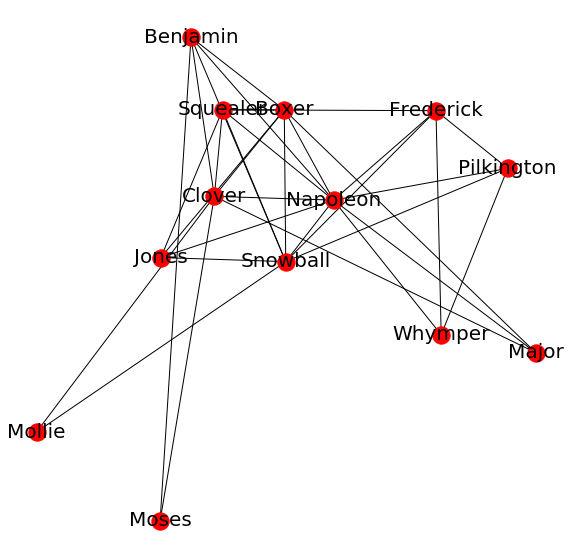

In [276]:
#set canvas size
plt.subplots(figsize=(10,10))

#networkx graph time!
G = nx.Graph()
for i in sorted(node_list):
    G.add_node(i[0], size = i[1])
G.add_weighted_edges_from(updated_edge_list)

#check data of graphs
G.nodes(data=True)
G.edges(data = True)

#manually copy and pasted the node order using 'nx.nodes(G)'
#Couldn't determine another route to listing out the order of nodes for future work
node_order = ['snowball','napoleon','major','wyndle ', 'boxer', 'squealer', 'mollie', 'clover',
              'benjamin', 'moses', 'jones', 'jones', 'pilkington', 'whymper', 
              'frederick']

#reorder node list
updated_node_order = []
for i in node_order:
    for x in node_list:
        if x[0] == i:
            updated_node_order.append(x)
            
#reorder edge list - this was a pain
test = nx.get_edge_attributes(G, 'weight')
updated_again_edges = []
for i in nx.edges(G):
    for x in test.keys():
        if i[0] == x[0] and i[1] == x[1]:
            updated_again_edges.append(test[x])
# G.nodes(data=True)
type(G.edges(data=True))


AFG = nx.Graph()
AFG.add_edges_from(G.edges(data=True))
nx.draw(G, pos=nx.spring_layout(G),
        with_labels=True, node_color='red', font_size="20")
# for row in G.nodes(data=True):
#     AFG.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])

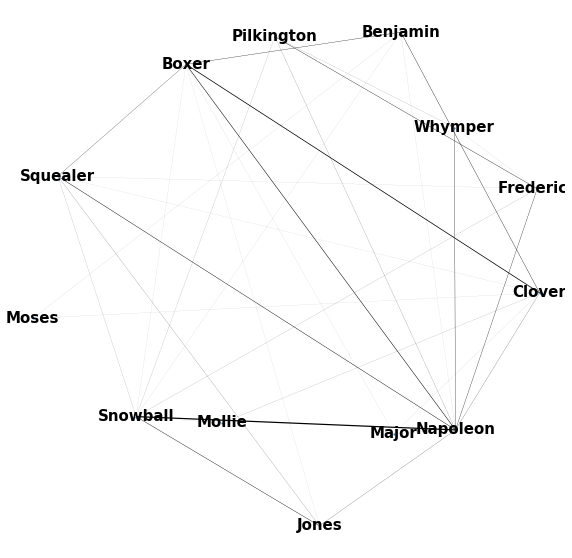

In [275]:
#drawing custimization
plt.subplots(figsize=(10,10))
node_scalar = 800
edge_scalar = 10
sizes = [x[1]*node_scalar for x in updated_node_order]
widths = [x*edge_scalar for x in updated_again_edges]

#draw the graph
pos = nx.spring_layout(G, k=0.42, iterations=17)

nx.draw(G, pos, with_labels=True, font_size = 15, font_weight = 'bold', 
        node_size = sizes, width = widths)

<font color=green size=4> ***Analysis conclusion:***</font>

<font color=black size=3> **a.the location of each node represents their importence level in this book.**</font>

 From the social graph provided by networkx method, we can see through the relationships between every character. In the centre of network graph is Snowball which is apparrently our main character and has the most complex connection with other characters. The other central characters are Napoleon and Squealer who both play significant roles in the process of the whole story. 

<font color=black size=3> **b.the distance between every two nodes shows the connection level.**</font>

Also the distance of every two nodes directly presents the strength of their relationship. For example, three main characters(Snowball, Napoleon and Squealer) has the closest distance, which means those characters have the strongest connection and affect greatly to the other two. The further the distance is, the lighter relationship they have.

In [263]:
nx.density(G)

0.4230769230769231

<font color=black size=2> **have a big picture of the important relationships:**</font>

In [266]:
important_relationships = [s + ', '+ t for s,t,d in G.edges(data=True)]
important_relationships

['Benjamin, Snowball',
 'Benjamin, Napoleon',
 'Benjamin, Boxer',
 'Benjamin, Clover',
 'Benjamin, Moses',
 'Boxer, Snowball',
 'Boxer, Napoleon',
 'Boxer, Major',
 'Boxer, Squealer',
 'Boxer, Clover',
 'Boxer, Jones',
 'Clover, Napoleon',
 'Clover, Major',
 'Clover, Squealer',
 'Clover, Mollie',
 'Clover, Moses',
 'Frederick, Snowball',
 'Frederick, Napoleon',
 'Frederick, Squealer',
 'Frederick, Pilkington',
 'Frederick, Whymper',
 'Jones, Snowball',
 'Jones, Napoleon',
 'Jones, Squealer',
 'Major, Napoleon',
 'Mollie, Snowball',
 'Napoleon, Snowball',
 'Napoleon, Squealer',
 'Napoleon, Pilkington',
 'Napoleon, Whymper',
 'Pilkington, Snowball',
 'Pilkington, Whymper',
 'Snowball, Squealer']

In [267]:
important_characters = []
for pair in important_relationships:
    important_characters.append(pair.split(', ')[0])
    important_characters.append(pair.split(', ')[1])
    
important_characters = list(set(important_characters))
important_characters

['Moses',
 'Mollie',
 'Benjamin',
 'Squealer',
 'Clover',
 'Frederick',
 'Boxer',
 'Whymper',
 'Jones',
 'Pilkington',
 'Major',
 'Napoleon',
 'Snowball']

<font color=black size=2> **Use adjacent matrix to plot the characters:**</font>

In [390]:
Adj = nx.to_scipy_sparse_matrix(G, dtype = np.float64)
print(Adj)

  (0, 1)	0.03017241379310345
  (0, 2)	0.034482758620689655
  (0, 7)	0.004310344827586207
  (0, 8)	0.004310344827586207
  (0, 10)	0.004310344827586207
  (1, 0)	0.03017241379310345
  (1, 2)	0.07327586206896551
  (1, 4)	0.004310344827586207
  (1, 5)	0.004310344827586207
  (1, 8)	0.05172413793103448
  (1, 10)	0.004310344827586207
  (1, 11)	0.021551724137931036
  (2, 0)	0.034482758620689655
  (2, 1)	0.07327586206896551
  (2, 5)	0.004310344827586207
  (2, 6)	0.008620689655172414
  (2, 7)	0.004310344827586207
  (2, 8)	0.017241379310344827
  (2, 11)	0.004310344827586207
  (3, 8)	0.03017241379310345
  (3, 9)	0.034482758620689655
  (3, 10)	0.008620689655172414
  (3, 11)	0.004310344827586207
  (3, 12)	0.004310344827586207
  (4, 1)	0.004310344827586207
  :	:
  (8, 9)	0.01293103448275862
  (8, 10)	0.1206896551724138
  (8, 11)	0.04310344827586207
  (8, 12)	0.03017241379310345
  (9, 3)	0.034482758620689655
  (9, 8)	0.01293103448275862
  (9, 10)	0.008620689655172414
  (9, 12)	0.008620689655172414
  (1

In [391]:
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix

def plot_coo_matrix(m):
    if not isinstance(m, coo_matrix):
        m = coo_matrix(m)
    fig = plt.figure()
    fig, ax = plt.subplots(figsize=(10, 5))
    # you may have to replace 'axisbg' below with 'facecolor', depending on the version of your matplotlib
    ax = fig.add_subplot(111, facecolor='black') #axisbg='b')
    ax.plot(m.col, m.row, 's', color='white', ms=1)
    ax.set_xlim(0, m.shape[1])
    ax.set_ylim(0, m.shape[0])
    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

In [392]:
np.seterr(divide='ignore')

degrees = np.ravel(Adj.sum(axis =1))
Deginv = sparse.diags(1 / degrees).tocsr()
print(Deginv)

  (0, 0)	12.88888888888889
  (1, 1)	5.2727272727272725
  (2, 2)	6.8235294117647065
  (3, 3)	12.210526315789473
  (4, 4)	13.647058823529413
  (5, 5)	77.33333333333333
  (6, 6)	77.33333333333333
  (7, 7)	116.0
  (8, 8)	3.012987012987013
  (9, 9)	15.466666666666665
  (10, 10)	5.043478260869565
  (11, 11)	10.545454545454545
  (12, 12)	23.2


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

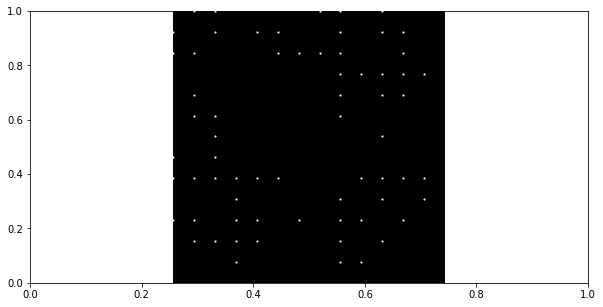

In [393]:
A = Adj.tocoo()
ax = plot_coo_matrix(A)
ax.figure.show()

<font color=black size=2> **Use transition matrix to plot the characters:**</font>

In [394]:
Trans = (Deginv @ Adj).T
print(Trans)

  (10, 0)	0.05555555555555556
  (8, 0)	0.05555555555555556
  (7, 0)	0.05555555555555556
  (2, 0)	0.4444444444444445
  (1, 0)	0.3888888888888889
  (11, 1)	0.11363636363636363
  (10, 1)	0.022727272727272724
  (8, 1)	0.2727272727272727
  (5, 1)	0.022727272727272724
  (4, 1)	0.022727272727272724
  (2, 1)	0.3863636363636363
  (0, 1)	0.1590909090909091
  (11, 2)	0.029411764705882356
  (8, 2)	0.11764705882352942
  (7, 2)	0.029411764705882356
  (6, 2)	0.05882352941176471
  (5, 2)	0.029411764705882356
  (1, 2)	0.5
  (0, 2)	0.23529411764705885
  (12, 3)	0.05263157894736842
  (11, 3)	0.05263157894736842
  (10, 3)	0.10526315789473684
  (9, 3)	0.42105263157894735
  (8, 3)	0.3684210526315789
  (11, 4)	0.17647058823529413
  :	:
  (3, 8)	0.09090909090909091
  (2, 8)	0.05194805194805195
  (1, 8)	0.15584415584415584
  (0, 8)	0.012987012987012988
  (12, 9)	0.1333333333333333
  (10, 9)	0.1333333333333333
  (8, 9)	0.19999999999999998
  (3, 9)	0.5333333333333332
  (11, 10)	0.043478260869565216
  (9, 10)	0.0

Compute the pagerank of character interaction using one of the methods we developed in class together, and plot the most important few characters in this book.

In [395]:
import scipy

In [396]:
import scipy.sparse as sparse 

In [397]:
n = len(characters)
n

14

In [399]:
from scipy.sparse.linalg import spsolve
dampling = 0.85
beta = 1 - dampling

I = sparse.eye(13,format = 'csc')
pagerank = spsolve(I - dampling*Trans, np.full(13, beta /13))

In [423]:
def pagerank_plot(in_degrees, pageranks, names, *,
                  annotations=[], **figkwargs):
    """Plot node pagerank against in-degree, with hand-picked node names."""

    fig, ax = plt.subplots(**figkwargs)
    ax.scatter(in_degrees, pageranks, c=[0.9, 0.2, 0], lw=0)
    for name, indeg, pr in zip(names, in_degrees, pageranks):
        if name in annotations:
            text = ax.text(indeg+0.1, pr, name)

    ax.set_ylim(0, np.max(pageranks) *1.1)
    ax.set_xlim(-1, np.max(in_degrees) *1.1)
    ax.set_ylabel('Rank')
    ax.set_xlabel('In-degree (percentage of interactions)')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


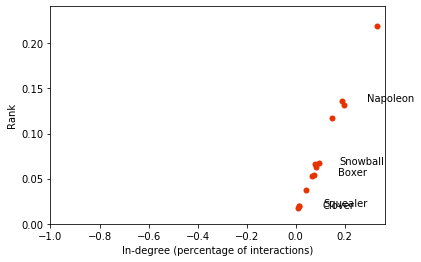

In [429]:
interesting = [
 'Squealer',
 'Clover',
 'Frederick',
 'Boxer',
 'Napoleon',
 'Snowball']
in_degree = np.ravel(Adj.sum(axis=0))
pagerank_plot(in_degree, pagerank, characters, annotations = interesting)

<font color=blue size=6>**Ⅵ. Emotional Analysis&Predict**</font>

<font color=black size=4>***Step 1: Split chapters&remove meaningless marks***</font>